In [1]:
import os
import cv2
import pandas as pd

# Path to your image folder
image_dir = './image'

data = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        try:
            age, gender, ethnicity, _ = filename.split('_', 3)

            # Load image in grayscale and resize to 48x48
            img_path = os.path.join(image_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (48, 48))

            # Flatten the image
            pixels = img.flatten().tolist()

            # Append row: [age, gender, ethnicity, pixel1, ..., pixel2304]
            row = [int(age), int(ethnicity), int(gender)] + pixels
            data.append(row)

        except Exception as e:
            print(f"Skipped {filename} due to error: {e}")

# Column names
columns = ['age', 'ethnicity', 'gender'] + [f'pixel{i}' for i in range(48*48)]

# Save to DataFrame
df = pd.DataFrame(data, columns=columns)

# Save to CSV
df.to_csv('utkface_48x48.csv', index=False)

print(f"Saved {len(df)} rows to utkface_48x48.csv")


Corrupt JPEG data: bad Huffman code


Skipped 61_1_20170109142408075.jpg due to error: not enough values to unpack (expected 4, got 3)


libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: premature end of data segment


Skipped 61_3_20170109150557335.jpg due to error: not enough values to unpack (expected 4, got 3)
Saved 10135 rows to utkface_48x48.csv


In [2]:
import pandas as pd

df = pd.read_csv('utkface_48x48.csv')

pixel_columns = [f'pixel{i}' for i in range(48*48)]
df['pixels'] = df[pixel_columns].values.tolist()

df = df.drop(columns=pixel_columns)

print(df.head())
df.to_csv('utkface_compact.csv', index=False)


   age  ethnicity  gender                                             pixels
0   28          4       1  [164, 164, 164, 164, 163, 163, 163, 163, 164, ...
1    1          0       0  [223, 224, 224, 224, 224, 224, 224, 226, 224, ...
2    4          4       1  [182, 184, 185, 186, 188, 191, 194, 195, 197, ...
3   85          0       0  [25, 29, 126, 145, 36, 39, 46, 53, 57, 23, 38,...
4   75          1       0  [13, 14, 17, 18, 18, 19, 19, 19, 17, 62, 117, ...


In [9]:
import numpy as np
import ast

df = pd.read_csv("utkface_compact.csv")

X = df["pixels"].apply(ast.literal_eval)

X = np.stack(X.values)               # shape: (n_samples, 2304)
X = X.reshape(-1, 48, 48, 1)         # shape: (n_samples, 48, 48, 1)

print("X shape:", X.shape)


X shape: (10135, 48, 48, 1)


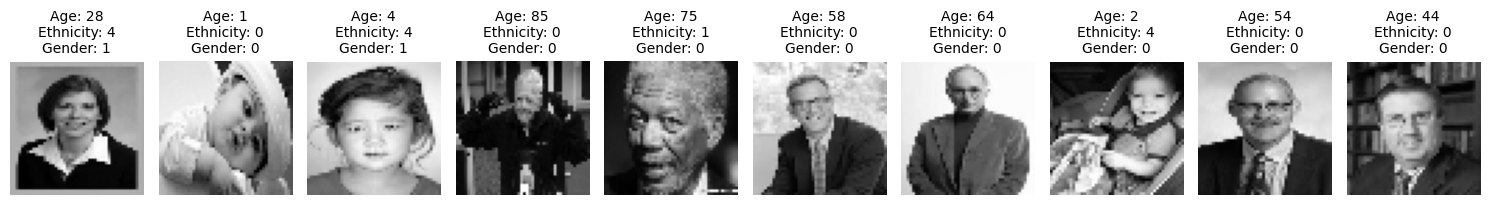

In [13]:
import matplotlib.pyplot as plt

N = 10
y = df[['age', 'ethnicity', 'gender']].iloc[:N]

# Plot images
fig, axes = plt.subplots(1, N, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i], cmap='gray')
    ax.axis("off")
    ax.set_title(f"Age: {y.iloc[i]['age']}\nEthnicity: {y.iloc[i]['ethnicity']}\nGender: {y.iloc[i]['gender']}", fontsize=10)

plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
import numpy as np

# Load both datasets
df_compact = pd.read_csv('utkface_compact.csv')
df_extra = pd.read_csv('age_gender.csv')

# Drop 'img_name' column
df_extra = df_extra.drop(columns=['img_name'])

# Convert 'pixels' column from space-separated string to list of numbers
df_extra['pixels'] = df_extra['pixels'].apply(lambda x: np.fromstring(x, sep=' ').tolist())

# If needed (ensure df_compact['pixels'] is already in list form)
# If not, uncomment the line below:
# df_compact['pixels'] = df_compact['pixels'].apply(ast.literal_eval)

# Combine both datasets
df_combined = pd.concat([df_compact, df_extra], ignore_index=True)

# Save
df_combined.to_csv('combined_dataset.csv', index=False)
print("✅ Combined shape:", df_combined.shape)


✅ Combined shape: (33840, 4)
